In [10]:
import tensorflow as tf
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline 

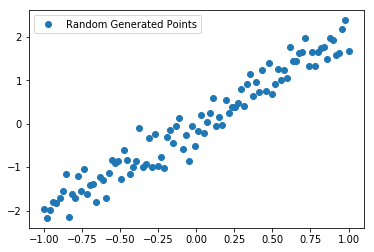

In [16]:
train_x = np.linspace(-1, 1, 100)
train_y = 2 *  train_x + np.random.randn(*train_x.shape) * 0.3
plt.plot(train_x, train_y, 'o', label = 'Random Generated Points')
plt.legend()
plt.show()

In [17]:
# input and output
X = tf.placeholder("float")
Y = tf.placeholder("float")

# parameters
W = tf.Variable(tf.random_normal([1]), name = 'weight')
B = tf.Variable(tf.zeros([1]), name = 'bias')

# forward propagation
Z = tf.multiply(X, W) + B

# back propagation
cost = tf.reduce_mean(tf.square(Y - Z))

learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

In [18]:
init = tf.global_variables_initializer()
training_epochs = 20

with tf.Session() as sess:
    sess.run(init)
    plotdata = {"batch_size":[], "loss":[]}
    for epoch in range(training_epochs):
        for (x,y) in zip(train_x, train_y):
            sess.run(optimizer, feed_dict={X:x, Y:y})
            
        loss = sess.run(cost, feed_dict={X:train_x, Y:train_y})
        print("Epoch: ", epoch+1, "  cost: ", loss, "     W: ", sess.run(W), "b: ", sess.run(B))
        
        if not (loss == "NA"):
            plotdata["batch_size"].append(epoch)
            plotdata["loss"].append(loss)
    
    print("Finished!")
    print("cost: ", sess.run(cost, feed_dict={X:train_x, Y:train_y}), "W: ", sess.run(W), "b: ", sess.run(B))
    
    
    

Epoch:  1   cost:  0.1959197      W:  [1.5227146] b:  [0.15177503]
Epoch:  2   cost:  0.11135853      W:  [1.7813001] b:  [0.09241803]
Epoch:  3   cost:  0.08576516      W:  [1.9195863] b:  [0.04452384]
Epoch:  4   cost:  0.079345904      W:  [1.990786] b:  [0.01787229]
Epoch:  5   cost:  0.07794083      W:  [2.027105] b:  [0.00402215]
Epoch:  6   cost:  0.07771727      W:  [2.0455887] b:  [-0.0030596]
Epoch:  7   cost:  0.07773118      W:  [2.0549898] b:  [-0.00666574]
Epoch:  8   cost:  0.077771276      W:  [2.059769] b:  [-0.00849966]
Epoch:  9   cost:  0.077800214      W:  [2.0622] b:  [-0.00943241]
Epoch:  10   cost:  0.07781714      W:  [2.0634363] b:  [-0.00990682]
Epoch:  11   cost:  0.077826306      W:  [2.0640647] b:  [-0.01014803]
Epoch:  12   cost:  0.07783111      W:  [2.0643835] b:  [-0.01027022]
Epoch:  13   cost:  0.07783361      W:  [2.0645463] b:  [-0.01033283]
Epoch:  14   cost:  0.077834874      W:  [2.0646286] b:  [-0.01036441]
Epoch:  15   cost:  0.07783554      W